In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
file_path = r"C:\Users\abipr\OneDrive\Desktop\New folder (3)\WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [6]:
try:
    df = pd.read_csv(file_path)
    print("Success! Data loaded.")
    print(f"Total Employees: {df.shape[0]}")
    print(f"Total Columns: {df.shape[1]}")
except FileNotFoundError:
    print("Error: Python still can't find the file. Check if the folder name has changed.")

Success! Data loaded.
Total Employees: 1470
Total Columns: 35


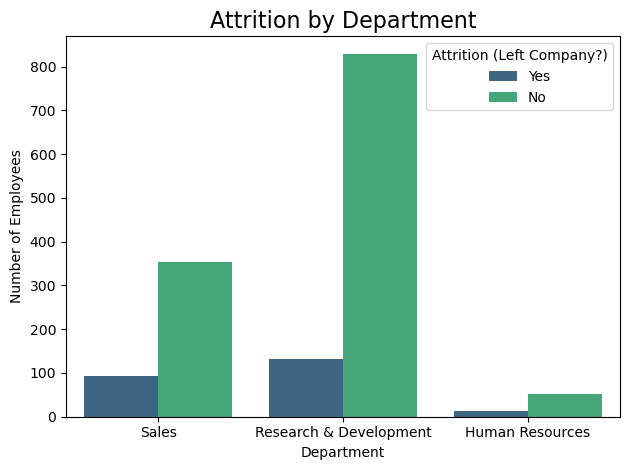

In [7]:
sns.countplot(x='Department', hue='Attrition', data=df, palette='viridis')

plt.title('Attrition by Department', fontsize=16)
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.legend(title='Attrition (Left Company?)', loc='upper right')

plt.tight_layout()
plt.show()

In [8]:
attrition_rates = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\n--- Key Insight for Resume ---")
print("Percentage of employees leaving by Department:")
print(attrition_rates['Yes'])



--- Key Insight for Resume ---
Percentage of employees leaving by Department:
Department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: Yes, dtype: float64


C:\Users\abipr\AppData\Local\Temp\ipykernel_25760\2922006233.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 'Yes']['Age'], shade=True, color='red', label='Left (Attrition=Yes)')
C:\Users\abipr\AppData\Local\Temp\ipykernel_25760\2922006233.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 'No']['Age'], shade=True, color='blue', label='Stayed (Attrition=No)')


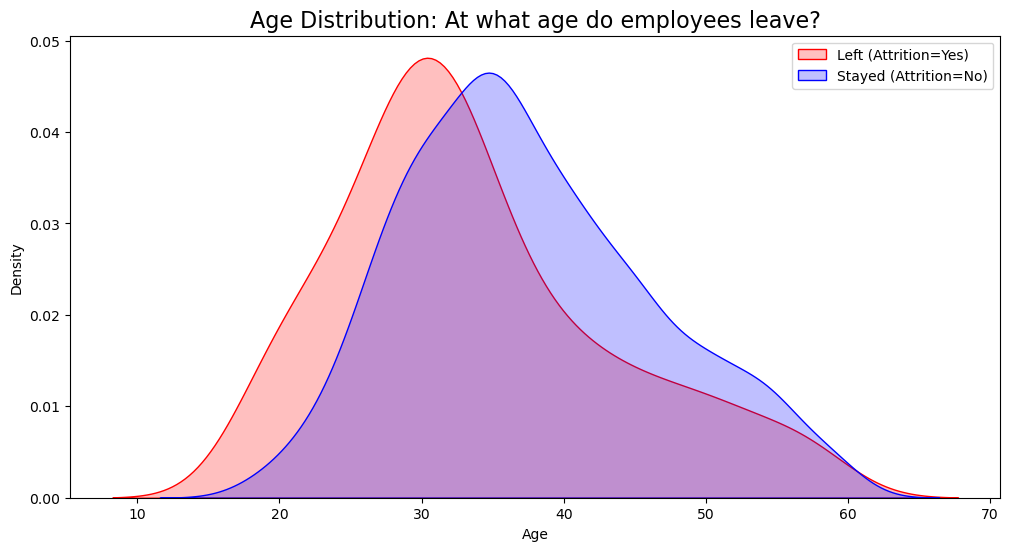

In [9]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Attrition'] == 'Yes']['Age'], shade=True, color='red', label='Left (Attrition=Yes)')
sns.kdeplot(df[df['Attrition'] == 'No']['Age'], shade=True, color='blue', label='Stayed (Attrition=No)')

plt.title('Age Distribution: At what age do employees leave?', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

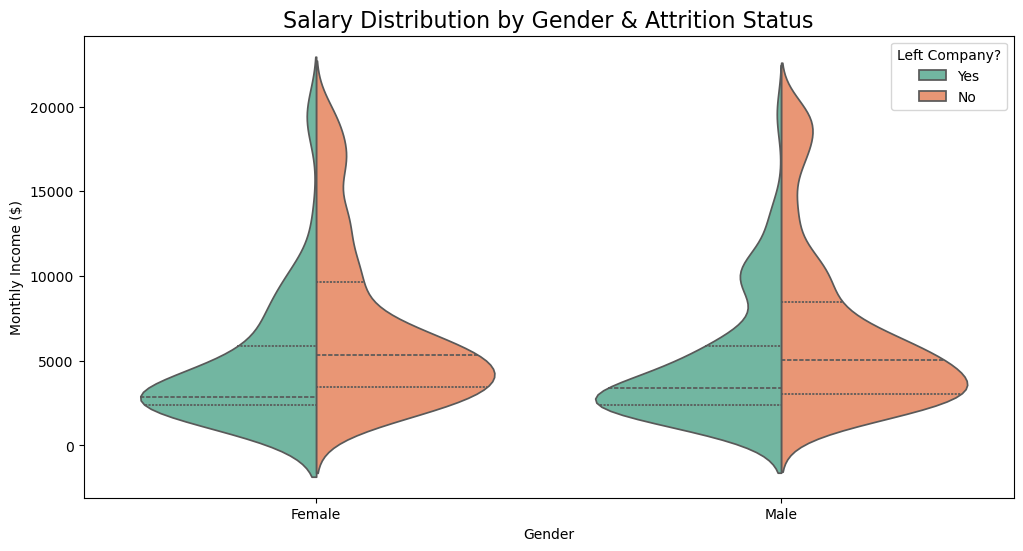

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='MonthlyIncome', hue='Attrition', 
               data=df, split=True, palette='Set2', inner="quartile")

plt.title('Salary Distribution by Gender & Attrition Status', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Monthly Income ($)')
plt.legend(title='Left Company?', loc='upper right')
plt.show()

In [11]:
summary_table = df.groupby('Attrition')[['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome']].mean()

print("--- 📊 STATISTICAL PROFILE (AVERAGES) ---")
print(summary_table)
print("\nInsight: Notice that Leavers are younger, earn less, and live further away.\n")

--- 📊 STATISTICAL PROFILE (AVERAGES) ---
                 Age  MonthlyIncome  YearsAtCompany  DistanceFromHome
Attrition                                                            
No         37.561233    6832.739659        7.369019          8.915653
Yes        33.607595    4787.092827        5.130802         10.632911

Insight: Notice that Leavers are younger, earn less, and live further away.



In [12]:
high_risk_employees = df[
    (df['Attrition'] == 'No') & 
    (df['JobSatisfaction'] <= 2) & 
    (df['YearsSinceLastPromotion'] >= 4)
]

print("--- ⚠️ FLIGHT RISK ALERT ---")
print(f"Number of employees matching 'High Risk' profile: {len(high_risk_employees)}")
print("Sample of High Risk Employees (ID & Dept):")
print(high_risk_employees[['EmployeeNumber', 'Department', 'JobRole', 'YearsSinceLastPromotion']].head())

--- ⚠️ FLIGHT RISK ALERT ---
Number of employees matching 'High Risk' profile: 112
Sample of High Risk Employees (ID & Dept):
    EmployeeNumber              Department                    JobRole  \
15              20  Research & Development     Manufacturing Director   
27              35                   Sales            Sales Executive   
63              81                   Sales            Sales Executive   
90             119  Research & Development  Healthcare Representative   
93             124  Research & Development  Healthcare Representative   

    YearsSinceLastPromotion  
15                        8  
27                        4  
63                        7  
90                       11  
93                        9  
